In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os ## create and read folder , copy , move , paste
import glob as gb ##create and read folder , copy , move , paste
import cv2 # to zip picture 
import tensorflow as tf
import keras

In [1]:
# path
trainpath = ''
testpath = ''

# Open Folders

# Check the train folder 

In [2]:
for folder in  os.listdir(trainpath + 'Training') : #  returns a list of the names of the entries in a directory
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg')) # search for files that match a specific file pattern or name
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 3789 in folder angry
For training data , found 436 in folder disgust
For training data , found 3887 in folder fear
For training data , found 6795 in folder happy
For training data , found 4838 in folder neutral
For training data , found 4803 in folder sad
For training data , found 3097 in folder surprise


# Check the test folder

In [3]:
for folder in  os.listdir(testpath +'Validation') : 
    files = gb.glob(pathname= str( testpath +'Validation//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 960 in folder angry
For testing data , found 111 in folder disgust
For testing data , found 1018 in folder fear
For testing data , found 1825 in folder happy
For testing data , found 1216 in folder neutral
For testing data , found 1139 in folder sad
For testing data , found 797 in folder surprise


_____

# Checking Images , it helping to resize (if need)



now how about the images sizes in train folder

In [4]:
size = []
for folder in  os.listdir(trainpath +'Training') : 
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)# read image 
        size.append(image.shape)# add image.shap
pd.Series(size).value_counts() # bring the same value of picture ((48, 48, 3) the is 28821)

(48, 48)    27645
dtype: int64

In [5]:
size = []
for folder in  os.listdir(testpath +'Validation') : 
    files = gb.glob(pathname= str( testpath +'Validation//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts() # bring the same value of picture ((48, 48, 3) the is 7066)

(48, 48)    7066
dtype: int64

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily 

let's use now size = 48 , so it will be suitable amount to contain accuracy without losing so much time in training

In [6]:
s = 48

# now we need to check the images sizes , to know ow they looks like

since we have 7 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [7]:
# check the size
# code is dictionary
# angry are key
# 0 are value
code = {'angry':0 ,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

read all pictues in 7 categories in training folder, ans use OpenCV to resize it , and to assign the y value , from the predefined function 

In [8]:
# open cv to compress images
X_train = [] # create list 
y_train = [] # create list , is number of folder (6 folder)
for folder in  os.listdir(trainpath +'Training') : 
    files = gb.glob(pathname= str( trainpath +'Training//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file) # read file
        image_array = cv2.resize(image , (s,s)) # resize images (48,48)= (s,s)
        X_train.append(list(image_array))
        y_train.append(code[folder])

how many items in X_train 

In [9]:
print(f'we have {len(X_train)} items in X_train')

we have 27645 items in X_train


## also we have a look to random pictures in X_train , and to adjust their title using the y value

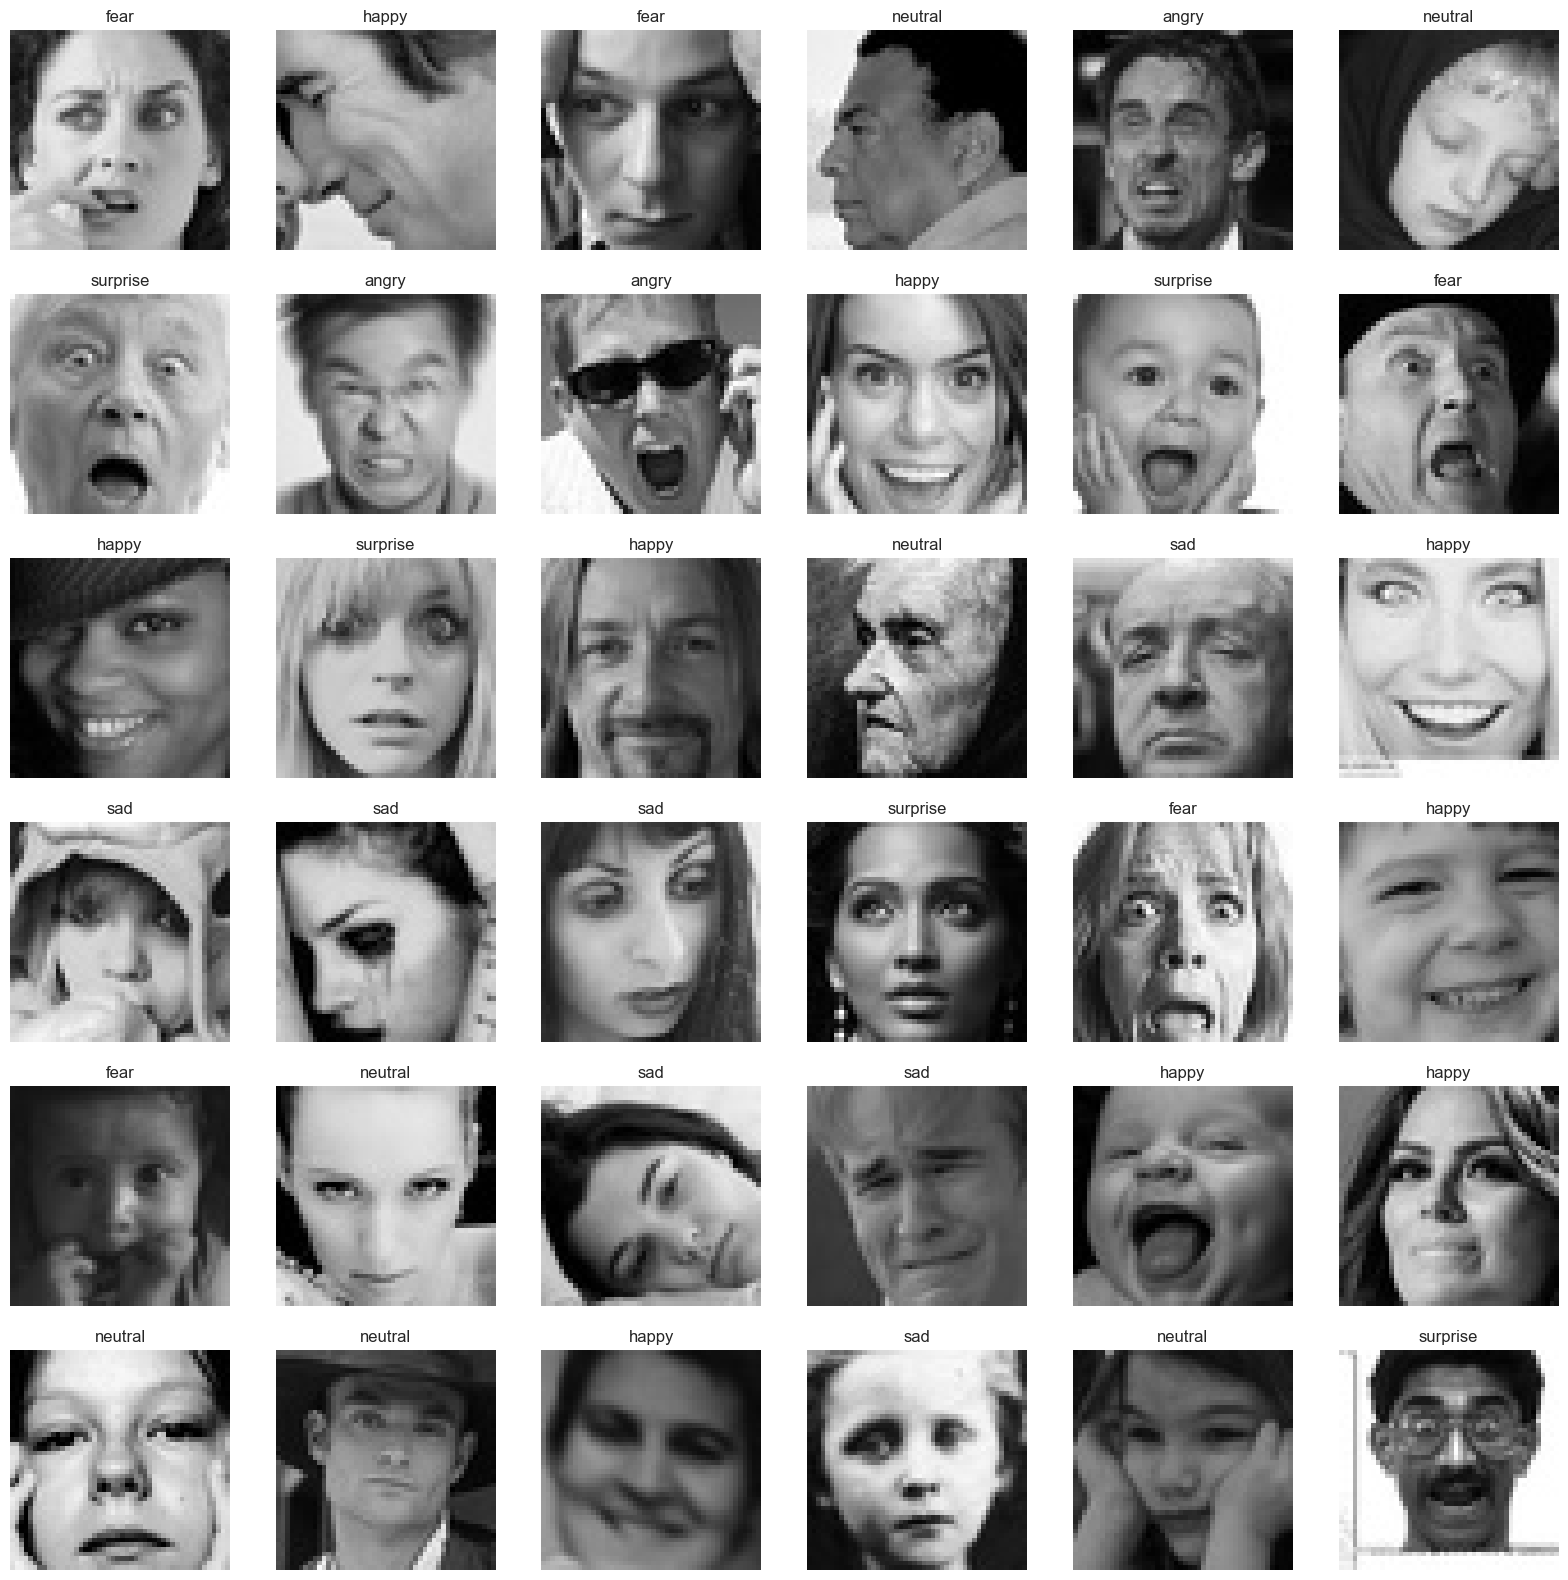

In [11]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) :  # enumerate numbering thing 
    # select 36 random number from 0 to len(x_train)= 14,034
    plt.subplot(6,6,n+1) # plot several images 6*6 ,
    plt.imshow(X_train[i])   # i is random number , print the zip pictures (opencv) 
    plt.axis('off')
    plt.title(getcode(y_train[i])) # go to the above function :  code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

##  Take a look to random pictures in Validation (test) data

In [12]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'Validation') : 
    files = gb.glob(pathname= str(testpath + 'Validation//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [13]:
print(f'we have {len(X_test)} items in X_test')

we have 7066 items in X_test


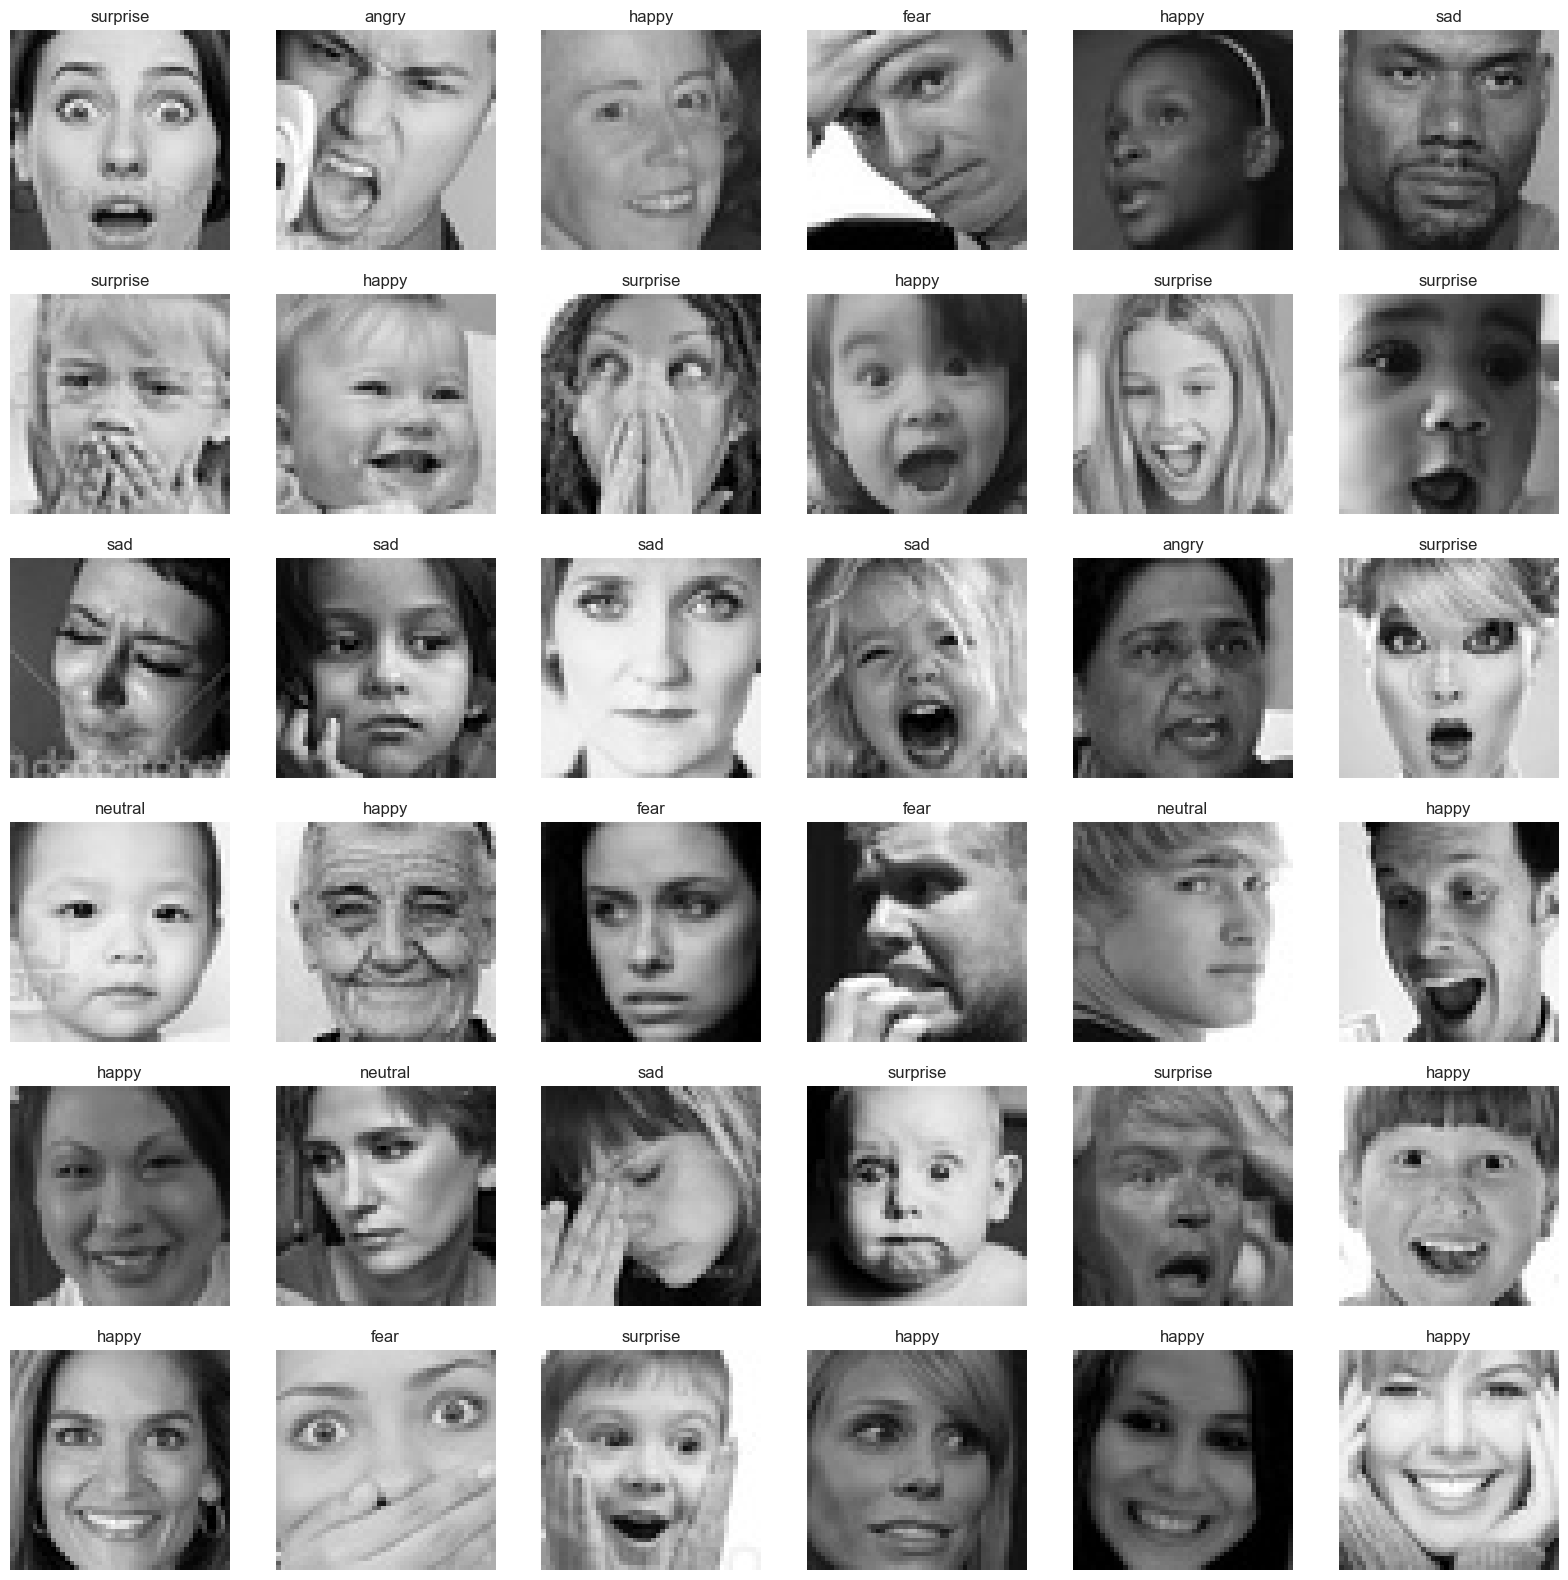

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

________

# Building The Model 

# building the model to train our data

# first to convert the data into arrays using numpy , because Keras and CNN accept only array

In [15]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')
# change it to 4 dimencion , because keras accept only 4 dimencion 

X_train shape  is (27645, 48, 48, 3)
X_test shape  is (7066, 48, 48, 3)
y_train shape  is (27645,)
y_test shape  is (7066,)


#  build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

KerasModel = Sequential()
KerasModel.add(Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3))) # 3 instead of 1 if pic with colors 
#filter = 200
KerasModel.add(Conv2D(150,kernel_size=(3,3),activation='relu'))
        # no need to give input shape because is will take from first layer
KerasModel.add(MaxPool2D(4,4))
KerasModel.add(Conv2D(120,kernel_size=(3,3),activation='relu'))
KerasModel.add(Conv2D(80,kernel_size=(3,3),activation='relu'))
KerasModel.add(Conv2D(50,kernel_size=(3,3),activation='relu'))
 # the number of filter increase
KerasModel.add(MaxPool2D(4,4))
KerasModel.add(Flatten()) ## change matrix to vector (2D to 1 D )
KerasModel.add(Dense(120,activation='relu'))
KerasModel.add(Dense(100,activation='relu'))
KerasModel.add(Dense(50,activation='relu'))
KerasModel.add(Dropout(0.5))
# for over fit 
KerasModel.add(Dense(7, activation = "softmax"))

C:\Users\mosta\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


## Another way to write the code 

In [ ]:
'''KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',padding = 'same',input_shape=(s,s,3)),
        # filter 200 we should give inputshape for the first layer
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        # no need to give input shape because is will take from first layer 
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        # the number of filter increase
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,
        # for over fit 
        keras.layers.Dense(7,activation='softmax') ,    
        ])'

## Compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [17]:
from tensorflow. keras. optimizers import Adam
KerasModel.compile(optimizer ='Adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Model Summary

In [18]:
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 200)         │           5,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 44, 44, 150)         │         270,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 11, 11, 150)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 9, 9, 120)           │         162,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 7, 7, 80)            │          86,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 50)            │          36,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 50)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │           6,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          12,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 7)                   │             357 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 584,027 (2.23 MB)

 Trainable params: 584,027 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

None


# learning_rate_reduction

# Reduce learning rate when a metric has stopped improving. Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This scheduler reads a metrics quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

In [19]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',patience=4,verbose=1,factor=0.5,min_lr=0.00001)

# EarlyStopping

In [20]:
# The patience parameter is the amount of epochs to check for improvement
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Data augmentation
Data augmentation is a technique used to artificially increase the size and diversity of a training dataset

In [21]:
from keras.src.legacy.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator()
datagen.fit(X_train) 

# Now to train the model , lets use 10 epochs

## I tried first 50 and then 20 epochs but after 10 epochs i notice that it will be big overfitting
# I decide to take 10 epochs for saving time 

In [22]:
epochs = 10
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs, batch_size= 64,verbose=1 , validation_data=(X_test, y_test),
                          callbacks=[learning_rate_reduction])

Epoch 1/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 261s 599ms/step - accuracy: 0.2088 - loss: 2.0998 - val_accuracy: 0.2583 - val_loss: 1.8114 - learning_rate: 0.0010
Epoch 2/10


C:\Users\mosta\anaconda3\Lib\site-packages\keras\src\callbacks\callback_list.py:97: UserWarning: Learning rate reduction is conditioned on metric `val_acc` which is not available. Available metrics are: accuracy,loss,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


432/432 ━━━━━━━━━━━━━━━━━━━━ 278s 643ms/step - accuracy: 0.2564 - loss: 1.7914 - val_accuracy: 0.3116 - val_loss: 1.7139 - learning_rate: 0.0010
Epoch 3/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 299s 691ms/step - accuracy: 0.3158 - loss: 1.6810 - val_accuracy: 0.4073 - val_loss: 1.5549 - learning_rate: 0.0010
Epoch 4/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 309s 715ms/step - accuracy: 0.3998 - loss: 1.5365 - val_accuracy: 0.4581 - val_loss: 1.4168 - learning_rate: 0.0010
Epoch 5/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 299s 693ms/step - accuracy: 0.4444 - loss: 1.4462 - val_accuracy: 0.4864 - val_loss: 1.3590 - learning_rate: 0.0010
Epoch 6/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 302s 700ms/step - accuracy: 0.4800 - loss: 1.3687 - val_accuracy: 0.5057 - val_loss: 1.3102 - learning_rate: 0.0010
Epoch 7/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 300s 693ms/step - accuracy: 0.4978 - loss: 1.3129 - val_accuracy: 0.5127 - val_loss: 1.2731 - learning_rate: 0.0010
Epoch 8/10
432/432 ━━━━━━━━━━━━━━━━━━━━ 312s 722ms/step - accuracy: 0.5138 

In [ ]:
#451/451 ━━━━━━━━━━━━━━━━━━━━ 342s 759ms/step - accuracy: 0.2215 - loss: 1.8516 - val_accuracy: 0.2583 - val_loss: 1.8222

how is the final loss & accuracy


In [23]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

221/221 ━━━━━━━━━━━━━━━━━━━━ 20s 90ms/step - accuracy: 0.4655 - loss: 1.3694
Test Loss is 1.2599306106567383
Test Accuracy is 0.5253325700759888


In [ ]:
# OR 
# KerasModel.evaluate(X_test, y_test)

# Saving Model 

In [39]:
KerasModel.save('KerasModel.h5')

# Loading  Model

In [ ]:
new_model = keras.models.load_model('KerasModel.h5')

# Plotting 

In [27]:
history = ThisModel

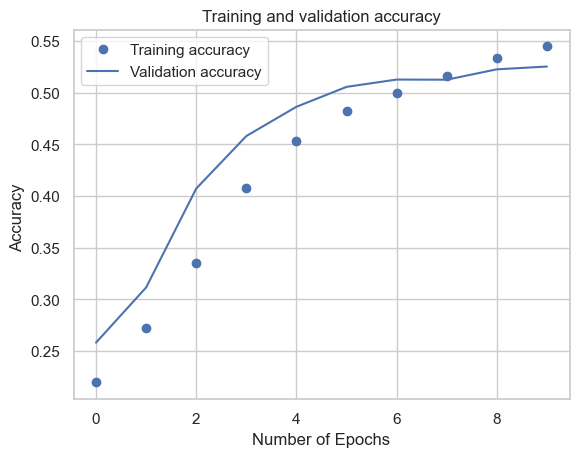

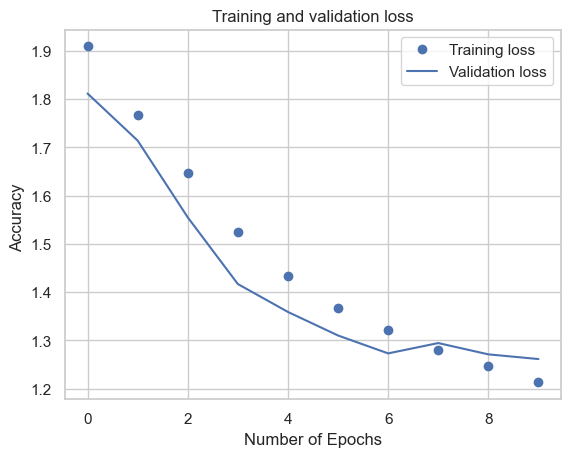

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy ")
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy ")
plt.legend()
plt.show()

# Prediction Random pictures 

In [29]:
predpath = ''

In [30]:
for folder in  os.listdir(trainpath + 'Prediction') : 
    files = gb.glob(pathname= str( trainpath +'Prediction//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 204 in folder angry
For training data , found 90 in folder disgust
For training data , found 216 in folder fear
For training data , found 369 in folder happy
For training data , found 144 in folder neutral
For training data , found 135 in folder sad
For training data , found 108 in folder surprise


In [31]:
size = []
for folder in  os.listdir(testpath +'Prediction') : 
    files = gb.glob(pathname= str( testpath +'Prediction//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(48, 48)    1266
dtype: int64

# also with Prediction data 

In [32]:
X_pred = []
for folder in  os.listdir(testpath +'Prediction') : 
    files = gb.glob(pathname= str(testpath + 'Prediction//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (48,48))
        X_pred.append(list(image_array))
# there is no y , because we let CNN predict the y        

In [33]:
print(f'we have {len(X_pred)} items in X_pred')

we have 1266 items in X_pred


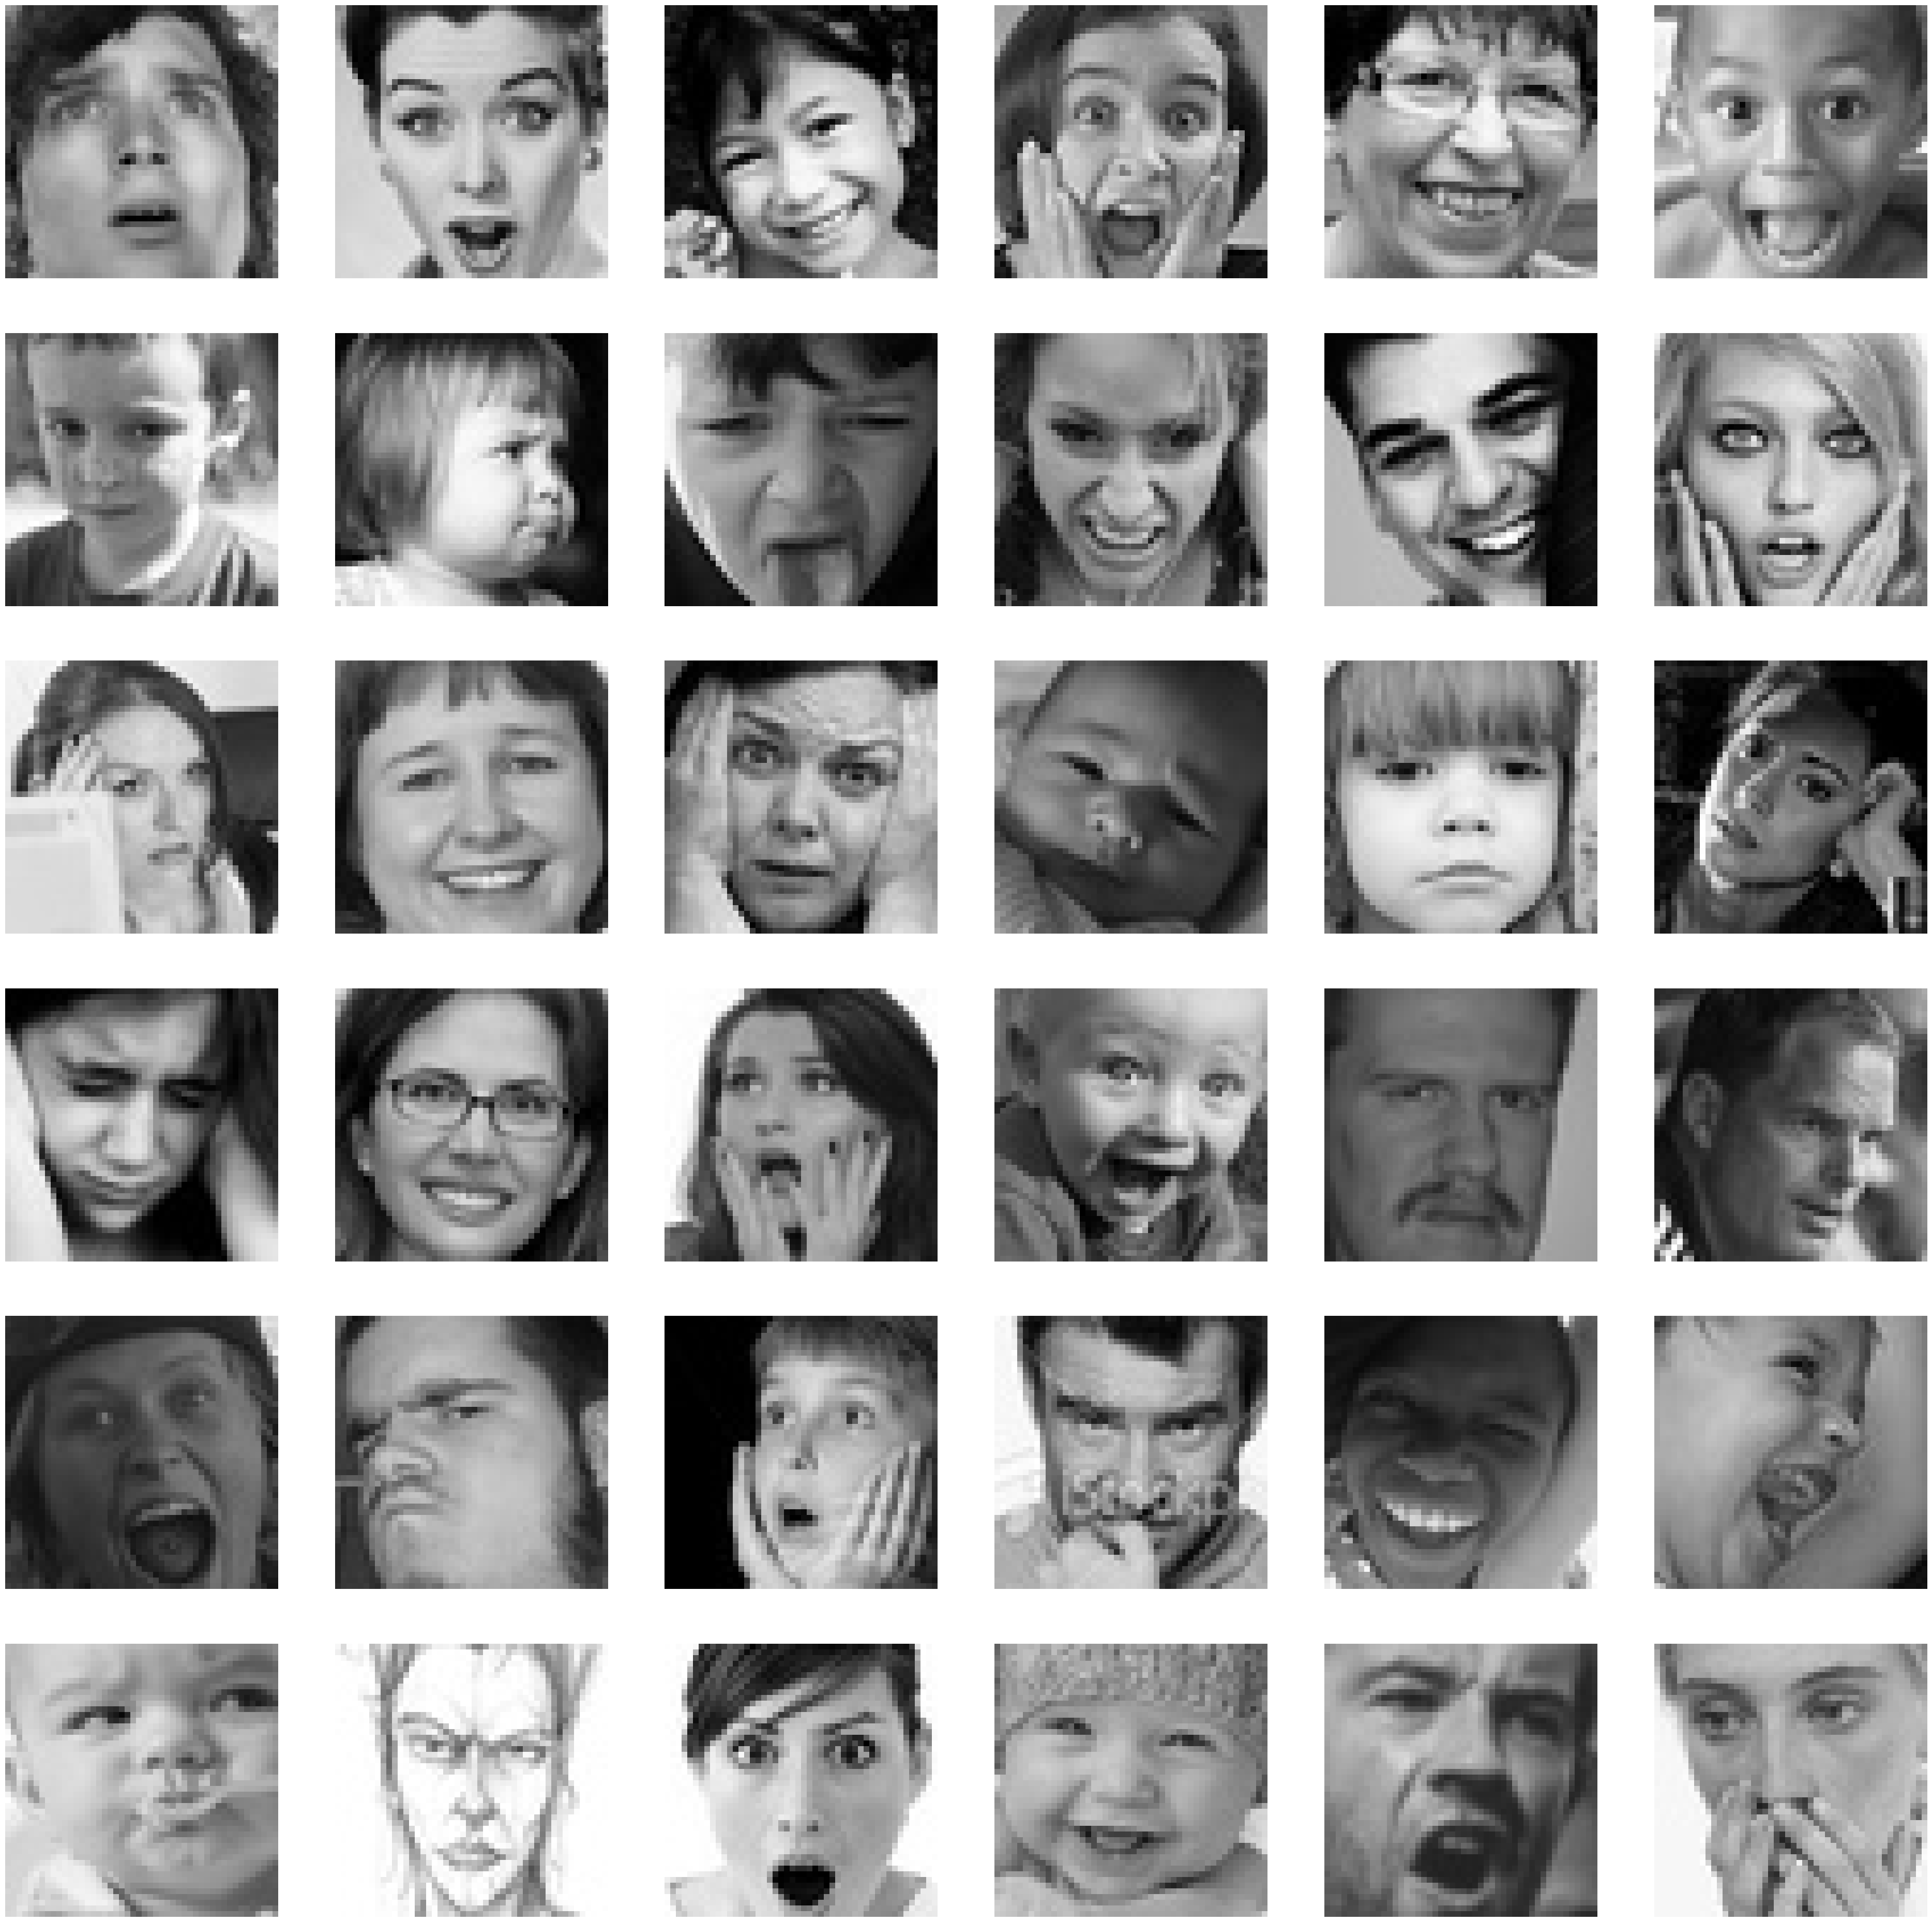

In [34]:
plt.figure(figsize=(48,48))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

# first to convert the data into arrays using numpy , because Keras and CNN accept only array

In [35]:
X_pred_array = np.array(X_pred)
print(f'X_pred shape  is {X_pred_array.shape}')

X_pred shape  is (1266, 48, 48, 3)


In [36]:
#now to predict X test

y_pred = KerasModel.predict(X_test)
print('Prediction Shape is {}'.format(y_pred.shape))

221/221 ━━━━━━━━━━━━━━━━━━━━ 17s 78ms/step
Prediction Shape is (7066, 7)


In [37]:
# now it's time to redict X Predict

y_result = KerasModel.predict(X_pred_array)
print('Prediction Shape is {}'.format(y_result.shape))

40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step
Prediction Shape is (1266, 7)


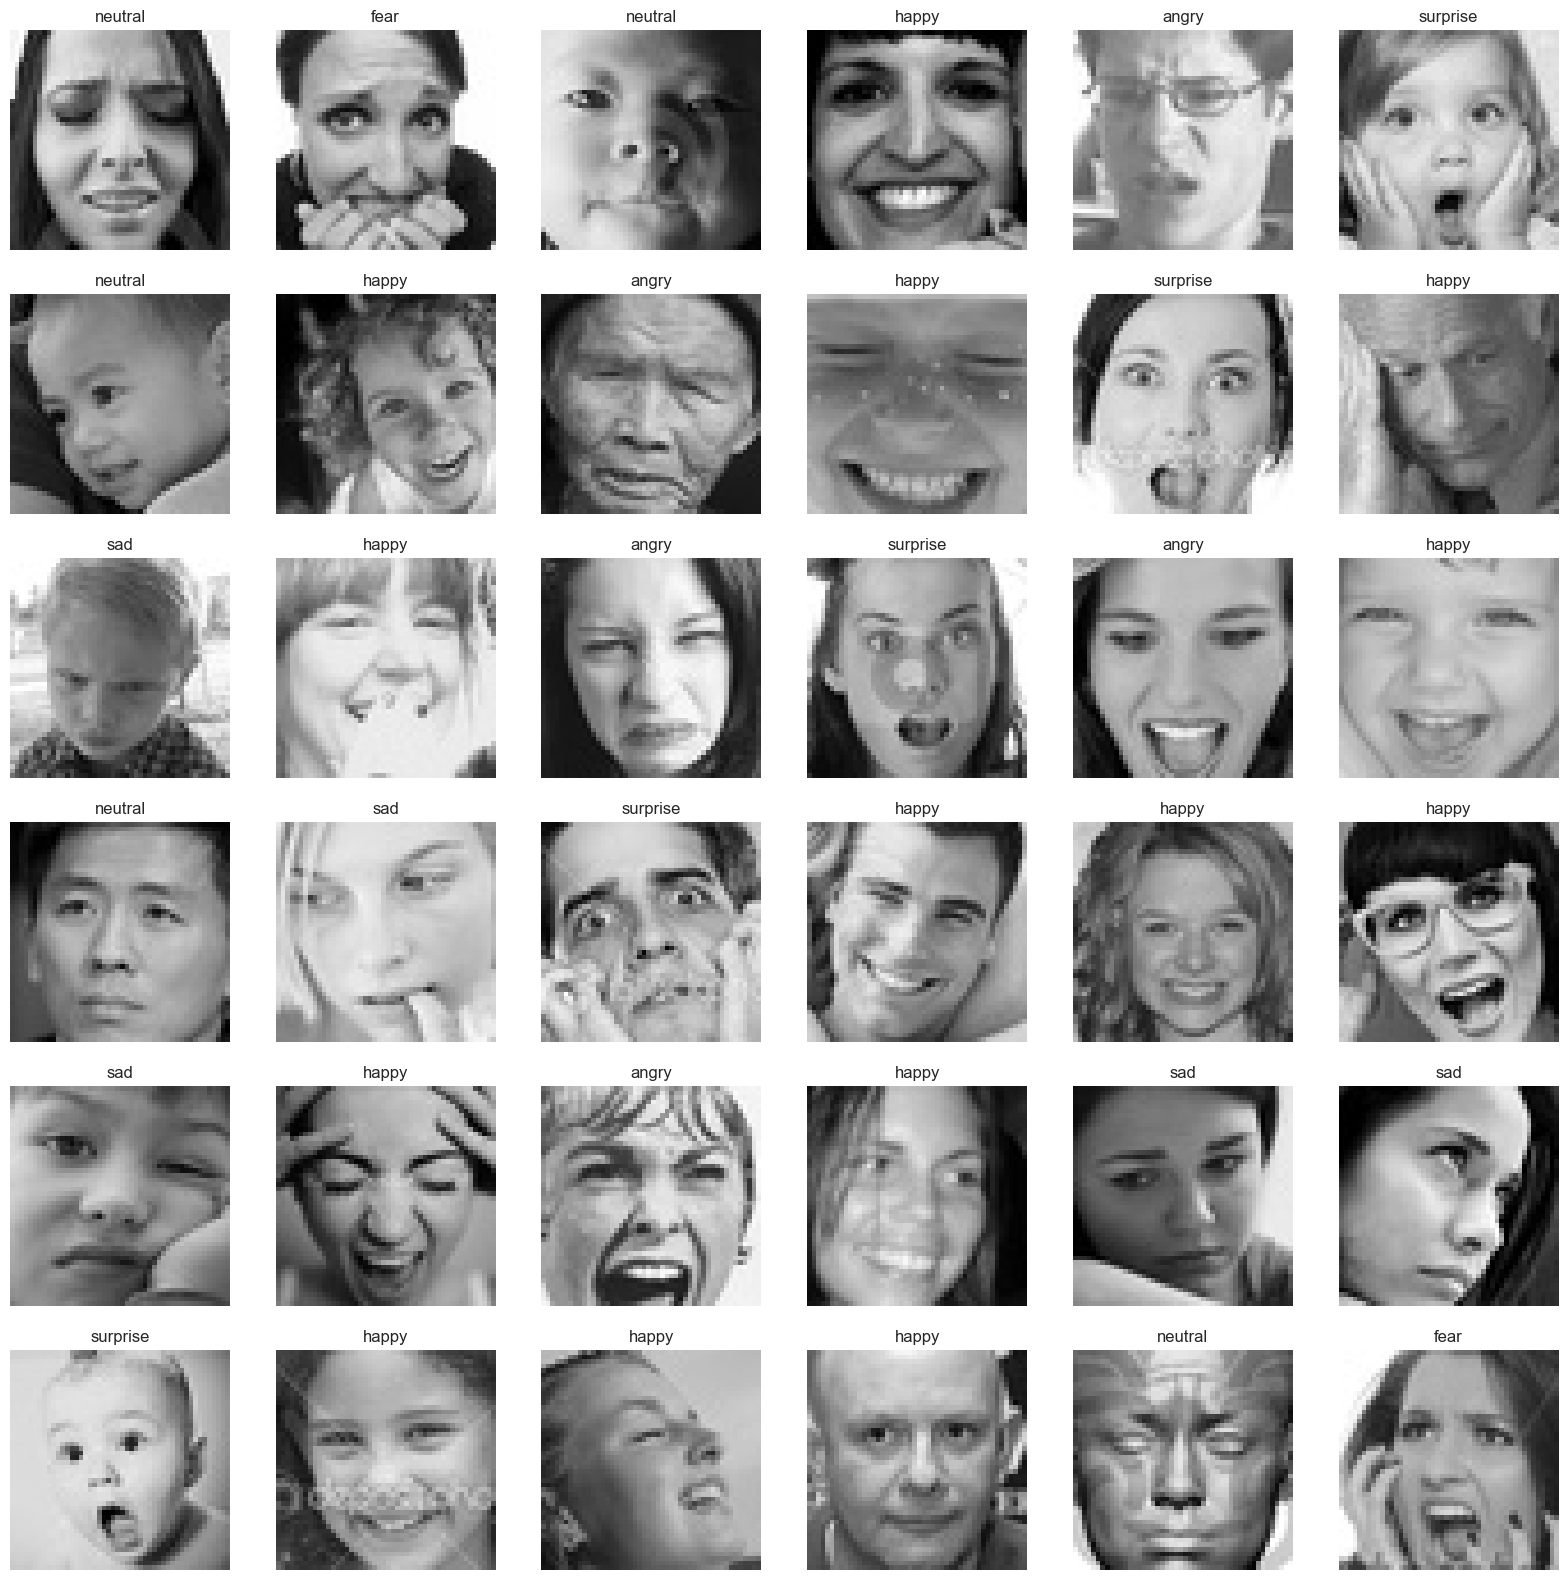

In [38]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i]))) ## argmax bring the max or best prediction the system predict it.